# ФИО Студента: Петров М.А.

# Номер группы: 18-ИВТ-2

# Вариант: 18

# Задание: mpg

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


Кодировка классификаторов:
1 – линейная регрессия без использования регуляризаторов;
3 – линейная регрессия, RIDGE регуляризатор;

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn import linear_model
%matplotlib inline



In [43]:
auto = pd.read_csv("auto-mpg_data.txt")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [44]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

## Задание 1:

Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. mpg - способность машины проехать на галлоне топлива
2. cylinders - цилиндры
3. displacement - смещение
4. horsepower - лошадиная сила
5. weight - вес
6. acceleration - ускорение
7. model year - год выпуска
8. origin - происхождение
9. car name - марка автомобиля



## Задание 2:

Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [45]:
print("До:", auto.shape)
auto = auto.drop_duplicates()
print("После:", auto.shape)

До: (392, 9)
После: (392, 9)


## Задание 3:

Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

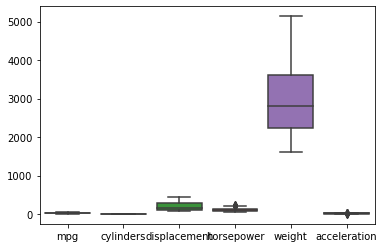

In [46]:
atribute = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']
sns.boxplot(data = auto[atribute])

#### Нормализуем нашу диаграмму:

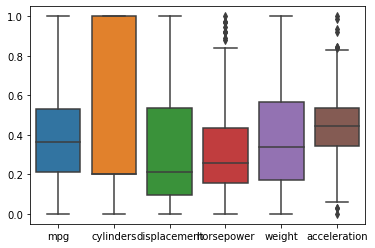

In [47]:
auto[atribute] = preprocessing.MinMaxScaler().fit_transform(auto[atribute].values.astype(float))
sns.boxplot(data = auto[atribute])

## Задание 4:

Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [48]:
cifri = [a for a in auto.columns if auto[a].dtype.name != 'object']
bukvi = [a for a in auto.columns if auto[a].dtype.name == 'object']
print (f"Числовые признаки: {cifri}")
print (f"Категориальные признаки: {bukvi}")


Числовые признаки: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
Категориальные признаки: ['car name']


In [49]:
auto[bukvi].describe()

,car name
count,392
unique,301
top,toyota corolla
freq,5


## Задание 5:

Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

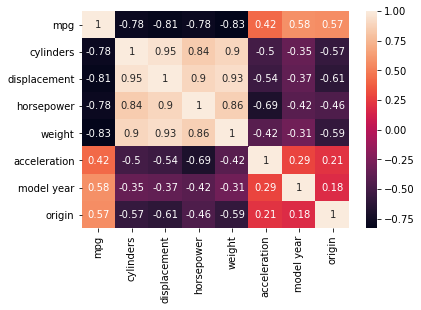

In [50]:
corr = auto.corr()
sns.heatmap(corr, annot = True)

## Задание 6:

Заполните пропущенные значения в данных;

In [51]:
auto.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
car name        392
dtype: int64

#### Пропущенных данных нет

## Задание 7:

Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

#### 1 – линейная регрессия без использования регуляризаторов;

In [52]:
auto = auto.drop(['car name'], axis=1)

In [53]:
x, y = auto.drop(['mpg'], axis=1), auto['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

regres = linear_model.LinearRegression()
regres.fit(x_train,y_train)
pred_regres = regres.predict(x_test)
print(pred_reg[:15] - y_test[:15])

220    0.012225
245   -0.181276
134   -0.052974
147    0.060059
390    0.059986
33    -0.005842
266    0.094240
226    0.066550
263    0.005314
327   -0.271103
188    0.022297
273    0.193215
9     -0.056836
236   -0.114104
211    0.081403
Name: mpg, dtype: float64


In [54]:
P, p_value_P = pearsonr(pred_regres, y_test)
S, p_value_S = spearmanr(pred_regres, y_test)
print(f"Корреляция Пирсона: {P} p_значение: {p_value_P}\nКорреляция Спирмена: {S} p_значение: {p_value_S}")

Корреляция Пирсона: 0.8884450605654504 p_значение: 4.870470040759004e-41
Корреляция Спирмена: 0.920624473853668 p_значение: 3.3536629644711317e-49


#### 3 – линейная регрессия, RIDGE регуляризатор;

In [55]:
regresia = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
regresia_grid = GridSearchCV(regresia, params)
regresia_grid.fit(x_train, y_train)
best_alpha = regresia_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.1


In [57]:
regresia = Ridge(alpha=best_alpha)
regresia.fit(x_train,y_train)
pred_regresia = regresia.predict(x_test)
print(pred_regresia[:15] - y_test[:15])

220    0.017195
245   -0.184473
134   -0.047946
147    0.061623
390    0.058975
33    -0.000113
266    0.092272
226    0.066637
263    0.007552
327   -0.271401
188    0.023635
273    0.196242
9     -0.063949
236   -0.117753
211    0.082812
Name: mpg, dtype: float64


In [59]:
P, p_value_P = pearsonr(pred_regresia, y_test)
S, p_value_S = spearmanr(pred_regresia, y_test)
print(f"Корреляция Пирсона: {P} p_значение: {p_value_P}\nКорреляция Спирмена: {S} p_значение: {p_value_S}")

Корреляция Пирсона: 0.8895618638651748 p_значение: 2.8085636775647626e-41
Корреляция Спирмена: 0.9203431295061603 p_значение: 4.083979413866556e-49
